In [2]:
print("hello world")

hello world


In [3]:
import matplotlib.pyplot as plt
import seaborn as s
import numpy as np
import pandas as pd


In [ ]:
dataset = pd.read_csv('TitanicDataset.csv')

dataset.info()

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
dataset.describe()

dataset.loc[:,dataset.isna().any()]

df = dataset.copy()
df.drop( columns= ['Cabin'] , inplace = True )

df.fillna(df['Age'].median(), inplace = True   )

df.fillna(df['Embarked'].mode()[0], inplace = True   )

print(dataset['Age'].median() , dataset['Age'].mean() )
print(df['Age'].median() , df['Age'].mean() )


28.0 29.69911764705882
28.0 29.36158249158249


In [36]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

std = StandardScaler()
minmax = MinMaxScaler()

df['Age_std'] = std.fit_transform(df[['Age']])
df['Age_min'] = minmax.fit_transform(df[['Age']])
df.head(
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_std,Age_min
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.565736,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.663861,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.258337,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.433312,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.433312,0.434531


In [69]:
# print(df['Embarked'].dtype)  # Check column type
# print(df['Embarked'].unique())  # Check unique values
# df['Embarked'] = df['Embarked'].astype(str)  # Convert ALL values to strings

# print(df['Embarked'].dtype)  # Check column type
# print(df['Embarked'].unique())  # Check unique values


print(df['Sex'].unique())  # Check unique values

[1 0]


In [55]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)

df['Sex'] = le.fit_transform( df ['Sex'])

newcols = pd.DataFrame( ohe.fit_transform( df[['Embarked']] ),  columns=ohe.get_feature_names_out(['Embarked']) )

df = pd.concat([df, newcols], axis=1)

df.drop(columns=['Embarked'] , inplace=True)

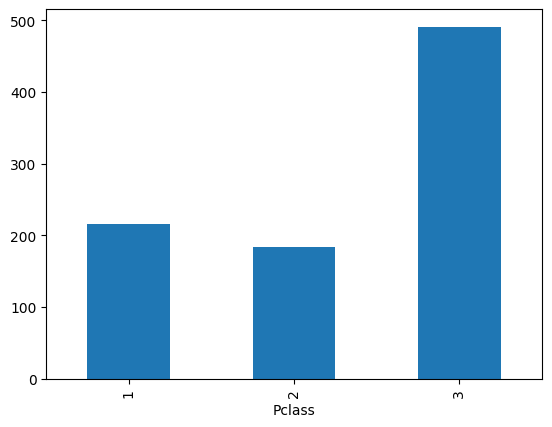

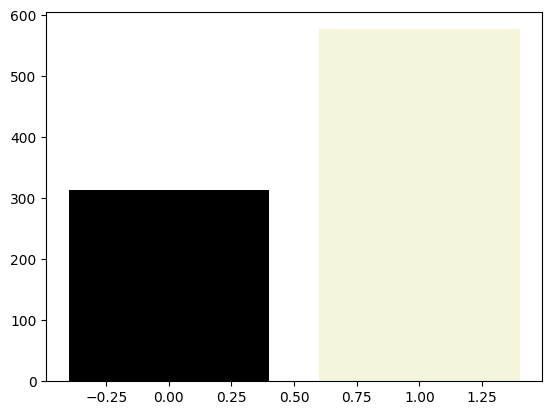

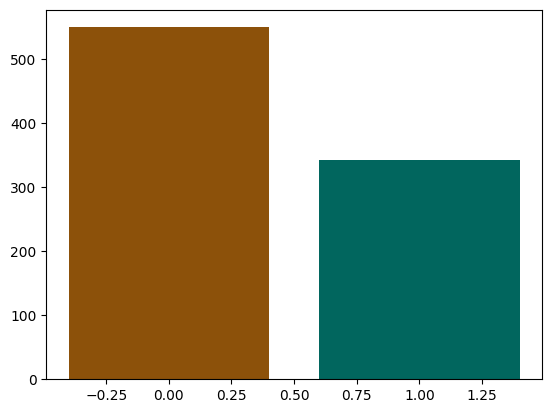

In [93]:
plt.figure(1)
df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.figure(2)
counts = df["Sex"].value_counts()

plt.bar(  x=counts.index ,height= counts.values , color= ['beige','black']  )

plt.figure(3)

surcounts = df["Survived"].value_counts()
plt.bar(  x=surcounts.index ,height= surcounts.values , color = ['#8c510a', '#01665e'] )
#['teal','red']
plt.show()



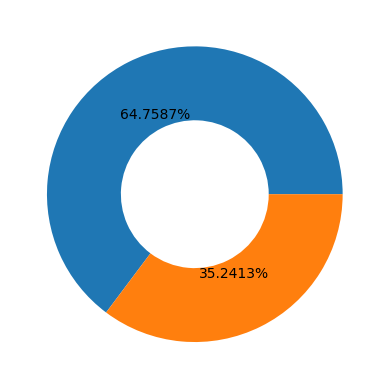

In [ ]:
plt,figure(1)
c = df["Sex"].value_counts()
plt.pie(c.values , wedgeprops={'width': 0.5},autopct='%1.4f%%' )
plt.show()



#Embarked column is no more there!